Social Good Recommendation System

Team - C
Members: Ajay Valecha, Prasun Srestha, Premkumar Loganathan

# Initialization codes & loading data

In [6]:
# Import libraries

# Data wrangling libraries
import pandas as pd
import numpy as np
import random as rnd

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


# Pre-processing

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


# ML models 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

# ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [7]:
# Set Display parameters

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)
pd.set_option('display.max_rows', 500)



In [9]:
# Loading the dataset 
df_donors_raw = pd.read_csv('Donors.csv')
df_donations_raw = pd.read_csv('Donations.csv')
df_projects_raw = pd.read_csv('Projects.csv')
df_resources_raw = pd.read_csv('Resources.csv')
df_schools_raw = pd.read_csv('Schools.csv')
df_teachers_raw = pd.read_csv('Teachers.csv')


In [15]:
df_zip_raw = pd.read_csv('US Zip Codes from 2013 Government Data.csv')


# Exploratory Data Analysis

## Data Summary

### Donor data

In [34]:
df_donors_raw.head()

,Donor ID,Donor City,Donor State,Donor Is Teacher,Donor Zip
0,00000ce845c00cbf0686c992fc369df4,Evanston,Illinois,No,602
1,00002783bc5d108510f3f9666c8b1edd,Appomattox,other,No,245
2,00002d44003ed46b066607c5455a999a,Winton,California,Yes,953
3,00002eb25d60a09c318efbd0797bffb5,Indianapolis,Indiana,No,462
4,0000300773fe015f870914b42528541b,Paterson,New Jersey,No,075


In [35]:
df_donors_raw.describe(include=['object']).transpose()

,count,unique,top,freq
Donor ID,2122640,2122640,d024db1e540996812a929413bcbc5d66,1
Donor City,1909543,15204,Chicago,34352
Donor State,2122640,52,California,294695
Donor Is Teacher,2122640,2,No,1910355
Donor Zip,1942580,1934,606,34628


### Donations data

In [36]:
df_donations_raw.head()

,Project ID,Donation ID,Donor ID,Donation Included Optional Donation,Donation Amount,Donor Cart Sequence,Donation Received Date
0,000009891526c0ade7180f8423792063,688729120858666221208529ee3fc18e,1f4b5b6e68445c6c4a0509b3aca93f38,No,178.37,11,2016-08-23 13:15:57
1,000009891526c0ade7180f8423792063,dcf1071da3aa3561f91ac689d1f73dee,4aaab6d244bf3599682239ed5591af8a,Yes,25.00,2,2016-06-06 20:05:23
2,000009891526c0ade7180f8423792063,18a234b9d1e538c431761d521ea7799d,0b0765dc9c759adc48a07688ba25e94e,Yes,20.00,3,2016-06-06 14:08:46
3,000009891526c0ade7180f8423792063,38d2744bf9138b0b57ed581c76c0e2da,377944ad61f72d800b25ec1862aec363,Yes,25.00,1,2016-05-15 10:23:04
4,000009891526c0ade7180f8423792063,5a032791e31167a70206bfb86fb60035,6d5b22d39e68c656071a842732c63a0c,Yes,25.00,2,2016-05-17 01:23:38


In [37]:
# Distribution of all int and float variables
df_donations_raw.describe(include=['int64','float']).transpose()

,count,mean,std,min,25%,50%,75%,max
Donation Amount,4687884.0,60.668789,166.899615,0.01,14.82,25.0,50.0,60000.0
Donor Cart Sequence,4687884.0,143.054495,872.308646,1.00,1.00,2.0,12.0,18116.0


In [38]:
df_donations_raw.describe(include=['object']).transpose()

,count,unique,top,freq
Project ID,4687884,901965,c34218abf3fecd36be01305d67ed7fbb,863
Donation ID,4687884,4687844,c86dde6bc2afe4b2a890789abb3d8551,2
Donor ID,4687884,2024554,39df9399f5384334a42905bcf0acdcbf,18035
Donation Included Optional Donation,4687884,2,Yes,4001709
Donation Received Date,4687884,4066370,2018-03-08 12:51:27,72


### Projects data

In [39]:
df_projects_raw.head()

,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Expiration Date,Project Current Status,Project Fully Funded Date
0,7685f0265a19d7b52a470ee4bac883ba,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,25,Teacher-Led,Stand Up to Bullying: Together We Can!,"Did you know that 1-7 students in grades K-12 is either a bully or a victim of bullying? My goal is to raise prevention through being educated and aware of the effects and consequences of bullying. They need to know how to access a science-base, research-validated curriculum via Internet and books. <!--DONOTREMOVEESSAYDIVIDER-->We are part of a small pre-k and kindergarten primary center. Our student population is less than 300 students. My students are learning to stand up to bullying. They are great kids discovering the world and learning to read and write. But I worry that next year when they leave our primary center and attend their neighborhood school (student population over 500) they will face a very different environment. I hope that the lessons that they have learned about friendships, kindness, and working cooperatively will reduce any instances of bullying. I want to raise awareness and educate my students so they can ask for help when they needed. Vigilance and discipline is the key! <!--DONOTREMOVEESSAYDIVIDER-->We know that knowledge is power; I want my students to know how to access information that will help them stand up to bullying. My project is to work with them in group discussions using their book, ""Bullying in Schools"" as they will all have a copy to keep and share with their parents. I will use the tablet with a small group of four kids at a time. Together we will navigate web sites to watch videos and testimonials. They can then talk about it, share with their parents, and I can lead class discussions. \n\nThere is access to information, articles and poems, and making them aware will educate them further on bullying. We must rise up and be the change to reach bullying in the heart of the problem. Bullying takes many forms and can happen in many contexts. Bullying is complex and there is no one size fits all solution for it, but knowledge is power. My students need to know how to find answers and information when they need it. <!--DONOTREMOVEESSAYDIVIDER-->This problem of bullying in schools is not one without a solution. We need every one helping teachers, parents, administrators and people in our community. The facts show that it is estimated that 160,000 children miss school every day due to fear of attack or intimidation by other students. Being aware of these facts should raise awareness and support. Your efforts will certainly have an impact. Together we can stand up to bullying.",Did you know that 1-7 students in grades K-12 is either a bully or a victim of bullying? My goal is to raise prevention through being educated and aware of the effects and consequences of...,"My students need 25 copies of ""Bullying in Schools"" for each to keep, ""Stand Up For Yourself and Your Friends: Dealing With Bullies"", ""A Smart Kid's Guide to Online Bullying"" and a tablet to research specific websites that talk about prevention strategies on bullying.",Applied Learning,"Character Education, Early Development",Grades PreK-2,Technology,361.80,2013-01-01,2013-05-30,Fully Funded,2013-01-11
1,f9f4af7099061fb4bf44642a03e5c331,08b20f1e2125103ed7aa17e8d76c71d4,cca2d1d277fb4adb50147b49cdc3b156,3,Teacher-Led,Learning in Color!,"Help us have a fun, interactive listening center in our class! Did you struggle to read when you were younger? Did it help to see the words and hear them read to you at the same time? This listening center will help the students in my class that need a little extra audi

In [40]:
df_projects_raw["Project Type"].value_counts()

Teacher-Led                 1092163
Professional Development      10235
Student-Led                    7619
Name: Project Type, dtype: int64

In [131]:
# fully funded projects' count of project resource category

df1 = df_projects_raw[df_projects_raw["Project Current Status"]=='Fully Funded']['Project Resource Category'].value_counts().reset_index()

In [135]:
df2 = df_projects_raw['Project Resource Category'].value_counts().reset_index()

,index,Project Resource Category
0,Supplies,386074
1,Technology,299034
2,Books,187287
3,Other,66909
4,Computers & Tablets,32915
5,Educational Kits & Games,22051
6,Trips,19886
7,Instructional Technology,18957
8,"Reading Nooks, Desks & Storage",15327
9,Flexible Seating,14425


In [133]:
df_test = pd.merge(df1,df2,on='index')

df_test

,index,Project Resource Category_x,Project Resource Category_y
0,Supplies,299474,386074
1,Technology,200476,299034
2,Books,151168,187287
3,Other,51546,66909
4,Computers & Tablets,21020,32915
5,Educational Kits & Games,16918,22051
6,Trips,14881,19886
7,Instructional Technology,14224,18957
8,Flexible Seating,10102,14425
9,"Reading Nooks, Desks & Storage",9932,15327


In [107]:
dfProject = pd.merge(df_projects_raw, df_schools_raw, on = 'School ID')

In [277]:
projColumns = ['Project ID', 'School ID', 'Project Type', 'Project Resource Category', 'Project Current Status', 'School Metro Type']

testProjectUpd = dfProject[projColumns]

testProjectTot = testProjectUpd[['Project Resource Category', 'School Metro Type']].value_counts().reset_index() # ['Project Resource Category', 'School Metro Type'])

testProjectFullFund = testProjectUpd[testProjectUpd["Project Current Status"]=='Fully Funded'][['Project Resource Category', 'School Metro Type']].value_counts().reset_index() # ['Project Resource Category', 'School Metro Type'])


testProject = pd.merge(testProjectFullFund, testProjectTot, on = ['Project Resource Category', 'School Metro Type'])


testProject.columns = ['Project Resource Category', 'School Metro Type', 'Fully Funded', 'Total Projects']

# testProject = testProject.sort_values(by = ['Project Resource Category', 'School Metro Type'])

testProject = testProject[testProject['School Metro Type'] != 'unknown']

testProject['Percent Fully Funded'] = round(testProject['Fully Funded'] / testProject['Total Projects'] * 100, 2)


testProject = testProject.sort_values(by = ['Percent Fully Funded', 'School Metro Type'], ascending = False)


# testProject.tail(20)

reqCat = ['Food, Clothing & Hygiene', 'Sports & Exercise Equipment', 'Computers & Tablets', 'Reading Nooks, Desks & Storage']

reqCat1 = testProject[testProject['Project Resource Category'] == 'Food, Clothing & Hygiene']
reqCat2 = testProject[testProject['Project Resource Category'] == 'Sports & Exercise Equipment']
reqCat3 = testProject[testProject['Project Resource Category'] == 'Computers & Tablets']
reqCat4 = testProject[testProject['Project Resource Category'] == 'Reading Nooks, Desks & Storage']

reqCat = [reqCat1, reqCat2, reqCat3, reqCat4]

vizProj = pd.concat(reqCat)

# vizProj.to_csv("visualizationDataFrame.csv")

vizProj
print(vizProj['Total Projects'].sum())

,Project Resource Category,School Metro Type,Fully Funded,Total Projects,Percent Fully Funded
33,"Food, Clothing & Hygiene",urban,2820,3138,89.87
81,"Food, Clothing & Hygiene",town,157,179,87.71
76,"Food, Clothing & Hygiene",rural,323,370,87.30
53,"Food, Clothing & Hygiene",suburban,1060,1239,85.55
34,Sports & Exercise Equipment,urban,2533,3108,81.50
44,Sports & Exercise Equipment,suburban,1485,1852,80.18
79,Sports & Exercise Equipment,town,206,257,80.16
63,Sports & Exercise Equipment,rural,647,824,78.52
20,Computers & Tablets,suburban,6540,10114,64.66
15,Computers & Tablets,urban,9763,15269,63.94


54666


{'figure.facecolor': 'white',
 'axes.labelcolor': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'axes.axisbelow': True,
 'grid.linestyle': '-',
 'text.color': '.15',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'xtick.top': False,
 'ytick.right': False,
 'axes.grid': True,
 'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'grid.color': '.8',
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'xtick.bottom': False,
 'ytick.left': False}

<Figure size 864x432 with 0 Axes>

Text(0.5, 0, 'Project Resource Category')

Text(0, 0.5, 'Percent of Projects Fully Funded')

Text(0.5, 1.0, 'Percentage of Fully Funded Projects by Categories')

[(40.0, 100.0)]

Text(0, 9, '87.6')

Text(0, 9, '80.1')

Text(0, 9, '62.9')

Text(0, 9, '63.4')

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

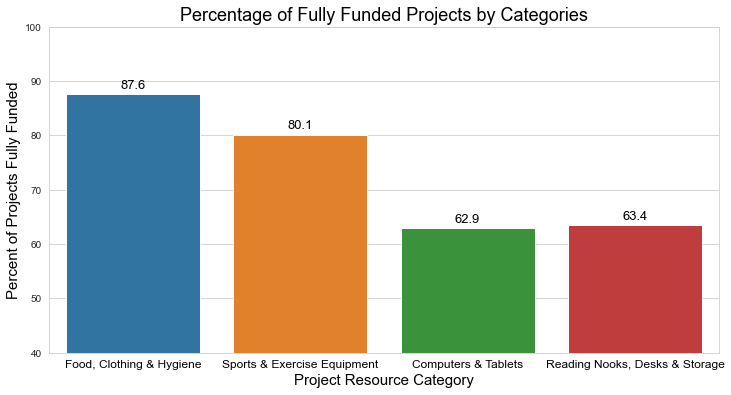

In [272]:
sns.axes_style("whitegrid");
plt.figure(figsize=(12,6));

ax = sns.barplot(x = 'Project Resource Category', y = "Percent Fully Funded", orient = "v", data=vizProj, ci = None);
# ax = sns.barplot(x = 'School Metro Type', y = "Percent Fully Funded", orient = "v", data=vizProj);

ax.set_xlabel("Project Resource Category", size = 15, color = "black");
ax.set_ylabel("Percent of Projects Fully Funded", size = 15, color = "black");
ax.set_title("Percentage of Fully Funded Projects by Categories", size = 18, loc = 'center', color = "black");
ax.set(ylim = (40, 100))

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), size = 13, color = "black",
                   textcoords = 'offset points')

plt.xticks(fontsize=12, color = "black")

plt.savefig("viz1.png")

{'figure.facecolor': 'white',
 'axes.labelcolor': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'axes.axisbelow': True,
 'grid.linestyle': '-',
 'text.color': '.15',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'xtick.top': False,
 'ytick.right': False,
 'axes.grid': True,
 'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'grid.color': '.8',
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'xtick.bottom': False,
 'ytick.left': False}

<Figure size 864x432 with 0 Axes>

Text(0.5, 0, 'School Metro Type')

Text(0, 0.5, 'Percent of Projects Fully Funded')

Text(0.5, 1.0, 'Percentage of Fully Funded Projects by Geography')

[(40.0, 80.0)]

Text(0, 9, '75.4')

Text(0, 9, '72.7')

Text(0, 9, '71.8')

Text(0, 9, '74.1')

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

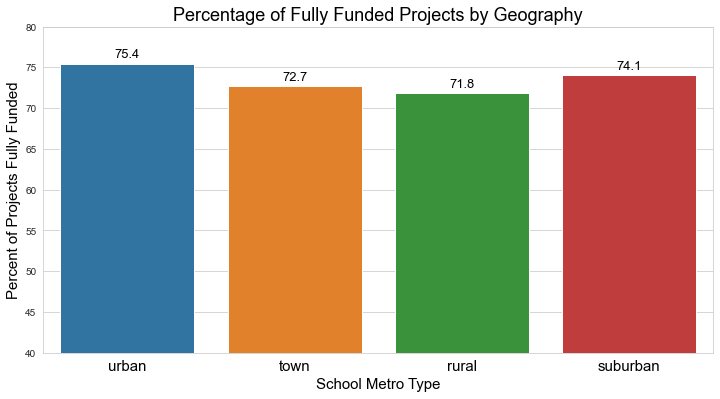

In [275]:
sns.axes_style("whitegrid");
plt.figure(figsize=(12,6));

# ax = sns.barplot(x = 'Project Resource Category', y = "Percent Fully Funded", orient = "v", data=vizProj, ci = None);
ax = sns.barplot(x = 'School Metro Type', y = "Percent Fully Funded", orient = "v", data=vizProj, ci = None);

ax.set_xlabel("School Metro Type", size = 15, color = "black");
ax.set_ylabel("Percent of Projects Fully Funded", size = 15, color = "black");
ax.set_title("Percentage of Fully Funded Projects by Geography", size = 18, loc = 'center', color = "black");
ax.set(ylim = (40, 80))

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), size = 13, color = "black",
                   textcoords = 'offset points')

plt.xticks(fontsize=15, color = "black")

# plt.savefig("viz2.png")

In [45]:
# Visualization Here

In [46]:
df_test.columns = ["Resource_type","Fully_funded_projects","Total_projects"]
df_test["Percent_fully_funded"] = round(((df_test["Fully_funded_projects"]/df_test["Total_projects"])*100),2)
# df_test.sort_values

df_test.head()

,Resource_type,Fully_funded_projects,Total_projects,Percent_fully_funded
0,Supplies,299474,386074,77.57
1,Technology,200476,299034,67.04
2,Books,151168,187287,80.71
3,Other,51546,66909,77.04
4,Computers & Tablets,21020,32915,63.86


In [ ]:
df1_state1 = df_proj_merged3.groupby( ['Donor State','Donor Is Teacher','School State'] ).size().reset_index(name='Num_donations')
df1_state1

In [47]:
# Distribution of all int and float variables
df_projects_raw.describe(include=['int64','float']).transpose()

,count,mean,std,min,25%,50%,75%,max
Teacher Project Posted Sequence,1110017.0,11.240499,25.954748,1.00,1.00,3.00,9.00,497.00
Project Cost,1110017.0,741.524038,1083.255570,35.29,335.12,515.35,867.52,255737.67


In [48]:
df_projects_raw.describe(include=['object']).transpose()

,count,unique,top,freq
Project ID,1110017,1110015,c940d0e78b7559573aca536db90c0646,2
School ID,1110017,72361,7f0412c9ac3cea57048543879e4e6318,1752
Teacher ID,1110017,395706,fa2f220b537e8653fb48878ebb38044d,320
Project Type,1110017,3,Teacher-Led,1092163
Project Title,1110011,926127,Flexible Seating,1107
Project Essay,1110016,1108272,"Remember all the required reading you did as a student? Remember trudging through page after page of a book you didn't choose only so that in the end you can do an assignment that you don't value? Now, imagine picking your own books in order to discuss and analyze the issues that matter most! <!--DONOTREMOVEESSAYDIVIDER-->I teach the most amazing 8th graders in the state of Texas. My students are zesty, passionate, hilarious, and aspiring literary critics. They are authors, scientists, and social revolutionaries. They are scholars. More than 75% of my students began the year reading 2 or more years below grade level. Make no mistake. Being behind does not mean that you aren't brilliant. Some of the brightest students I have ever taught have started significantly behind, caught up, and surpassed grade level norms all within a single year. With your help, we can all reach our goal of growing our reading by 2 grade levels and scoring in the 75th percentile on nationally normed tests. <!--DONOTREMOVEESSAYDIVIDER-->This year, my students and I are annihilating low expectations by setting the bar that EVERY student grows at least 2 grade levels and reads more than 10 novels. In order to achieve this, students will be supplementing our class time together with 30 minutes of reading each night. Students get to pick the books that they can best connect with. With more copies of best young adult fiction, we are sure to reach infinitely more students and inspire years of reading to come! <!--DONOTREMOVEESSAYDIVIDER-->Please make a difference for my students! It is my goal to grow our school library by over 2000 books this year and provide a variety of choices that are sure to challenge students at all readiness and interest levels! By helping us acquire copies of high interest books, you are you are helping us achieve each of the following: exposing students to a new genre, inspiring critical thinking and character study, and lighting the match that will spark much more reading!",14
Project Short Description,1110014,841893,"As a teacher in a low-income/high poverty school district, my students are faced with several challenges both in and out of the classroom. Despite the many challenges they face, I am looking to...",2139
Project Need Statement,1110014,1080023,My students need a document camera.,578
Project Subject Category Tree,1109988,51,Literacy & Language,250504
Project Subject Subcategory Tree,1109988,432,"Literacy, Mathematics",93286


### Resources data

In [49]:
df_resources_raw.head()

,Project ID,Resource Item Name,Resource Quantity,Resource Unit Price,Resource Vendor Name
0,000009891526c0ade7180f8423792063,chair move and store cart,1.0,350.00,NaN
1,00000ce845c00cbf0686c992fc369df4,sony mdr zx100 blk headphones,40.0,12.86,CDW-G
2,00002d44003ed46b066607c5455a999a,"gaiam kids stay-n-play balance ball, grey",4.0,19.00,Amazon Business
3,00002d44003ed46b066607c5455a999a,cf520x - giant comfy pillows - set of 4,1.0,269.00,Lakeshore Learning Materials
4,00002d44003ed46b066607c5455a999a,"serta lounger, mini, sky blue",1.0,131.85,Amazon Business


In [50]:
# Distribution of all int and float variables
df_resources_raw.describe(include=['int64','float']).transpose()

,count,mean,std,min,25%,50%,75%,max
Resource Quantity,7186149.0,2.816518,8.866547,0.0,1.00,1.00,2.0,4125.0
Resource Unit Price,7186138.0,53.413367,186.324751,0.0,7.26,14.39,36.4,97085.5


In [51]:
df_resources_raw.describe(include=['object']).transpose()

,count,unique,top,freq
Project ID,7210448,1208649,07a021f92447be2ef4a6cb955bc4c1d1,367
Resource Item Name,7209887,1073886,trip,21233
Resource Vendor Name,7128454,31,Amazon Business,3203262


### Schools data

In [52]:
df_schools_raw.head()

,School ID,School Name,School Metro Type,School Percentage Free Lunch,School State,School Zip,School City,School County,School District
0,00003e0fdd601b8ea0a6eb44057b9c5e,Capon Bridge Middle School,rural,56.0,West Virginia,26711,Capon Bridge,Hampshire,Hampshire Co School District
1,00004e32a448b4832e1b993500bf0731,The Woodlands College Park High School,urban,41.0,Texas,77384,The Woodlands,Montgomery,Conroe Ind School District
2,0002021bb799f28de224f1acc1ff08c4,Samantha Smith Elementary School,suburban,2.0,Washington,98074,Sammamish,King,Lake Washington Sch Dist 414
3,0004604f675212a8cac1161338265196,Kingsbury Country Day School,unknown,76.0,Michigan,48370,Oxford,Oakland,Michigan Dept Of Education
4,0004c9d50bcf0cea990f844e58b5e2c3,Redwater Elementary School,rural,50.0,Texas,75573,Redwater,Bowie,Redwater Ind Sch District


In [53]:
# Distribution of all int and float variables
df_schools_raw.describe(include=['int64','float']).transpose()

,count,mean,std,min,25%,50%,75%,max
School Percentage Free Lunch,71852.0,58.556115,25.508378,0.0,40.0,61.0,80.0,100.0
School Zip,72993.0,53382.093406,29131.096568,705.0,29554.0,53095.0,78572.0,99950.0


In [54]:
df_schools_raw.describe(include=['object']).transpose()

,count,unique,top,freq
School ID,72993,72993,b25089b90e5dce5cd9b6af5f1f39b2e1,1
School Name,72993,56831,Lincoln Elementary School,203
School Metro Type,72993,5,suburban,22992
School State,72993,51,California,8457
School City,72766,10400,New York City,2051
School County,72991,1782,Los Angeles,2110
School District,72993,10852,New York City Dept Of Ed,1718


### Teachers data

In [55]:
df_teachers_raw.head()

,Teacher ID,Teacher Prefix,Teacher First Project Posted Date
0,00000f7264c27ba6fea0c837ed6aa0aa,Mrs.,2013-08-21
1,00002d44003ed46b066607c5455a999a,Mrs.,2016-10-23
2,00006084c3d92d904a22e0a70f5c119a,Mr.,2016-09-08
3,0000a9af8b6b9cc9e41f53322a8b8cf1,Ms.,2015-10-25
4,0000d4777d14b33a1406dd6c9019fe89,Ms.,2017-02-10


In [56]:
df_teachers_raw.describe(include=['object']).transpose()

,count,unique,top,freq
Teacher ID,402900,402900,c6dc3a0b68ce9073192aa5b25ecf9745,1
Teacher Prefix,402872,6,Mrs.,202142
Teacher First Project Posted Date,402900,4699,2015-09-13,2067


### Zip data

In [57]:
df_zip_raw.head()

,ZIP,LAT,LNG
0,601,18.180555,-66.749961
1,602,18.361945,-67.175597
2,603,18.455183,-67.119887
3,606,18.158345,-66.932911
4,610,18.295366,-67.125135


## Missing data

In [58]:
dataframes_list = [df_donors_raw,df_donations_raw,df_projects_raw,df_resources_raw,df_schools_raw,df_teachers_raw]
dataframes_names = ["df_donors_raw","df_donations_raw","df_projects_raw","df_resources_raw","df_schools_raw","df_teachers_raw"]
for i in range(0,len(dataframes_list)):
    # Count of missing values as percentage of total data
    total = dataframes_list[i].isnull().sum().sort_values(ascending=False)
    percent =round(((dataframes_list[i].isnull().sum()/dataframes_list[i].isnull().count())*100),2).sort_values(ascending=False)
    columns_series = dataframes_list[i].columns.to_series()

    missing_data_summary_df = pd.concat([columns_series,total, percent],axis = 1, keys=['Column_Names','Total', 'Percent'])
    missing_data_summary_df.sort_values(['Percent'], inplace = True, ascending=False)
    missing_data_summary_df.reset_index(drop=True, inplace=True)
    print("\nMissing data in {}:\n".format(dataframes_names[i]))
    print("Length of Dataframe {}: {}\n".format(dataframes_names[i],len(dataframes_list[i])))
    print(missing_data_summary_df)


Missing data in df_donors_raw:

Length of Dataframe df_donors_raw: 2122640

       Column_Names   Total  Percent
0        Donor City  213097    10.04
1         Donor Zip  180060     8.48
2          Donor ID       0     0.00
3       Donor State       0     0.00
4  Donor Is Teacher       0     0.00

Missing data in df_donations_raw:

Length of Dataframe df_donations_raw: 4687884

                          Column_Names  Total  Percent
0                           Project ID      0      0.0
1                          Donation ID      0      0.0
2                             Donor ID      0      0.0
3  Donation Included Optional Donation      0      0.0
4                      Donation Amount      0      0.0
5                  Donor Cart Sequence      0      0.0
6               Donation Received Date      0      0.0

Missing data in df_projects_raw:

Length of Dataframe df_projects_raw: 1110017

                        Column_Names   Total  Percent
0          Project Fully Funded Date  28325

## Univariate analysis - Table wise 

### Donors

In [59]:
#Donor cities -single or multiple,
df_donors_raw.head()

,Donor ID,Donor City,Donor State,Donor Is Teacher,Donor Zip
0,00000ce845c00cbf0686c992fc369df4,Evanston,Illinois,No,602
1,00002783bc5d108510f3f9666c8b1edd,Appomattox,other,No,245
2,00002d44003ed46b066607c5455a999a,Winton,California,Yes,953
3,00002eb25d60a09c318efbd0797bffb5,Indianapolis,Indiana,No,462
4,0000300773fe015f870914b42528541b,Paterson,New Jersey,No,075


In [62]:
# Merge donor and donations table
df_donor_merged = pd.merge(df_donors_raw,df_donations_raw, on='Donor ID', how='left')
# Get the count of donors based on number of donations made
df_temp1 = df_donor_merged.groupby( ['Donor State','Donor ID'] ).size().reset_index(name='Num_donations')
#df_temp1[df_temp1['count']>1]
df_temp2 = df_temp1.groupby( ['Donor State','Num_donations'] ).size().reset_index(name='Num_donor')

# Count number of donors based on one or more donations
df_temp3 = df_temp2.assign(
 Single_donor = np.where(df_temp2['Num_donations']== 1 , df_temp2.Num_donor,0),
 Recurring_donor = np.where(df_temp2['Num_donations'] >1,df_temp2.Num_donor,0)
  ).groupby('Donor State').agg({'Single_donor':sum, 'Recurring_donor':sum})

# Get total donors 
df_temp3['Total_donors'] = df_temp3['Single_donor'] + df_temp3['Single_donor']

# Sort the table based on number of donors 
df_temp3.sort_values(by='Total_donors',ascending=False, inplace=True)

In [64]:
df_donor_merged.groupby( ['Donor State','Donor ID'] ).size().reset_index(name='Num_donations')

,Donor State,Donor ID,Num_donations
0,Alabama,000107cdc0ebf5aa274c12837cf16de7,1
1,Alabama,00028d5d75335732b1c46c54c5c847dd,1
2,Alabama,0002e7d0648c093bf75829e52c1ea21a,1
3,Alabama,0005fe4ee8c0133cac16534e2c7a1e48,1
4,Alabama,00066ccc94981679216ed6c32d5f57e4,1
...,...,...,...
2122635,other,fffc109f8eb0f207ab91aa48fedd1bc0,1
2122636,other,fffc1eb8cb432425e07f87f488e5ed36,1
2122637,other,fffc374bd73f1d8ac0fc12ff64efa86d,1
2122638,other,fffc9a46393622e1833579de583cf21f,1


In [65]:
df_temp3['Percent_multiple']=df_temp3['Recurring_donor']/df_temp3['Total_donors']
df_temp3

,Single_donor,Recurring_donor,Total_donors,Percent_multiple
Donor State,,,,
California,211572,83123,423144,0.196441
Texas,102140,32309,204280,0.158160
New York,100591,37366,201182,0.185732
Florida,81507,27321,163014,0.167599
other,81337,26472,162674,0.162730
Illinois,76542,27839,153084,0.181854
North Carolina,60935,23315,121870,0.191310
Pennsylvania,53957,18323,107914,0.169793
Georgia,46892,16839,93784,0.179551


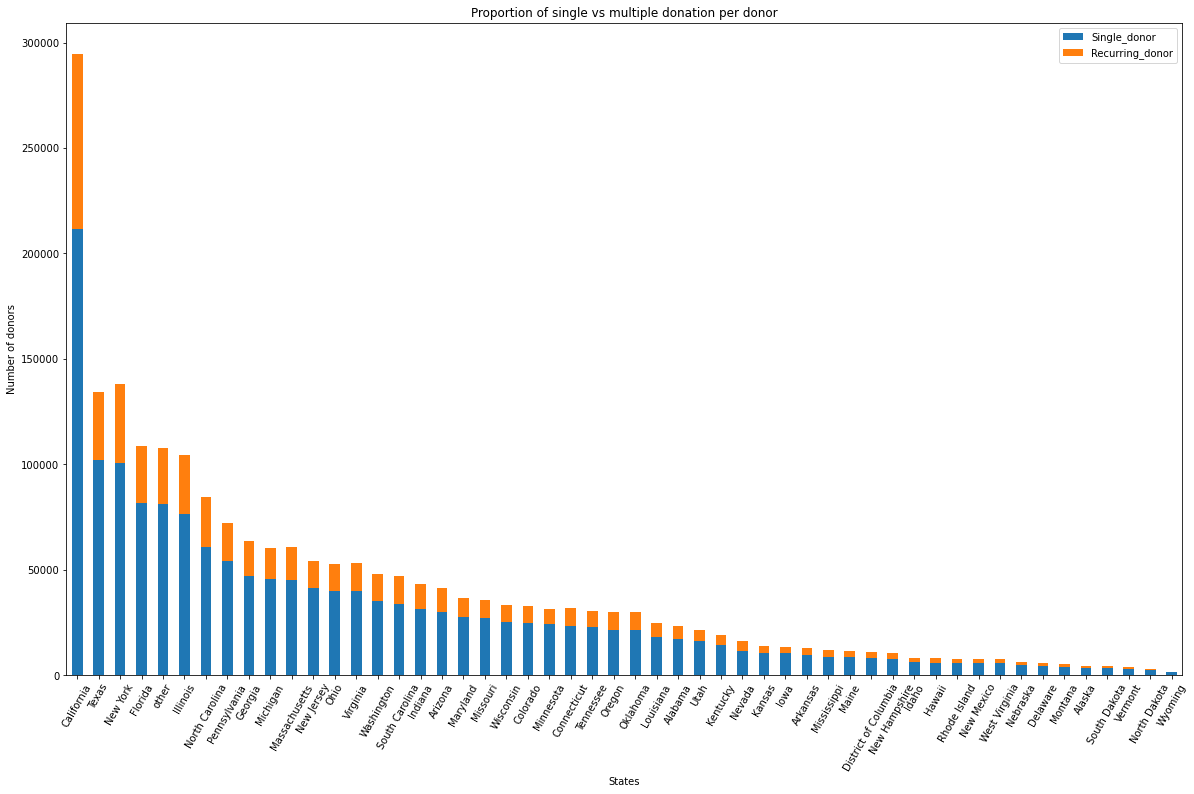

In [66]:
#df_temp3.plot(kind='bar',stacked=True)

ax = df_temp3[["Single_donor", "Recurring_donor"]].plot(kind="bar",\
                                                        stacked=True, figsize=(20,12),\
                                                        title = "Proportion of single vs multiple donation per donor");
fig = ax.get_figure();
plt.xlabel("States");
plt.ylabel("Number of donors");
plt.xticks(rotation=60);

Text(0.5, 0, 'State')

Text(0, 0.5, 'No of Donations')

Text(0.5, 1.0, 'Proportion of single vs multiple donation per donor')

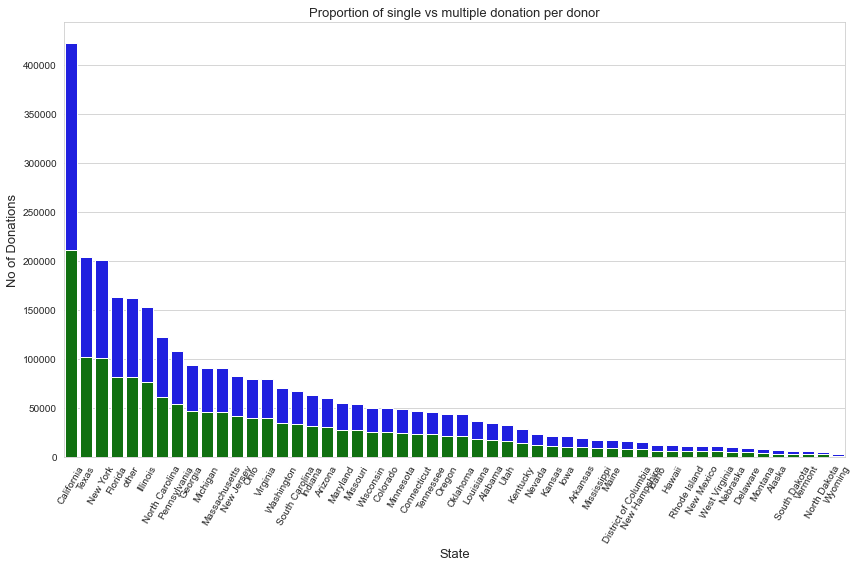

In [67]:
# Print the number of donors who have donated once vs many times for all states
df_temp4 = df_temp3.copy().reset_index()
sns.set_style("whitegrid");
sns.set_context({"figure.figsize": (14, 8)});
ax1 = sns.barplot(x = df_temp4['Donor State'], y = df_temp4['Total_donors'], color = "blue");
ax2 = sns.barplot(x = df_temp4['Donor State'], y = df_temp4['Single_donor'], color = "green");
ax1.set_xlabel("State", size = 13);
ax1.set_ylabel("No of Donations", size = 13);
ax1.set_title("Proportion of single vs multiple donation per donor", size = 13);
for tick in ax1.get_xticklabels():
    tick.set_rotation(60);

In [68]:
# State with more number of donations
# Yearly donations
# Donor as a teacher - single or multiple compared to not a teacher
# Donor as teacher - state
# Donors donation to different city project - proportion and visualization

In [69]:
t1 = df_donations_raw['Donor ID'].value_counts().rename_axis('unique_values').reset_index(name='counts')
t2 = t1["counts"].value_counts().rename_axis('No_of_donations').reset_index(name='No_of_donors')
#t2['No_of_donations'] = t2['No_of_donations'].astype(str)
t2['Percent'] = round((100 * t2['No_of_donors'] / t2['No_of_donors'].sum()),2)
freq_donation_table = t2[:6]

In [70]:
freq_donation_table

,No_of_donations,No_of_donors,Percent
0,1,1471613,72.69
1,2,274902,13.58
2,3,99063,4.89
3,4,49911,2.47
4,5,30578,1.51
5,6,19665,0.97


{'figure.facecolor': 'white',
 'axes.labelcolor': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'axes.axisbelow': True,
 'grid.linestyle': '-',
 'text.color': '.15',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'xtick.top': False,
 'ytick.right': False,
 'axes.grid': True,
 'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'grid.color': '.8',
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'xtick.bottom': False,
 'ytick.left': False}

<Figure size 864x432 with 0 Axes>

Text(0.5, 0, 'Percentage')

Text(0, 0.5, 'No of Donations')

Text(0.0, 1.0, 'No of Donations and Percentage')

Text(2, 0.040000000000000036, '(72.69)')

Text(2, 1.04, '(13.58)')

Text(2, 2.04, '(4.89)')

Text(2, 3.04, '(2.47)')

Text(2, 4.04, '(1.51)')

Text(2, 5.04, '(0.97)')

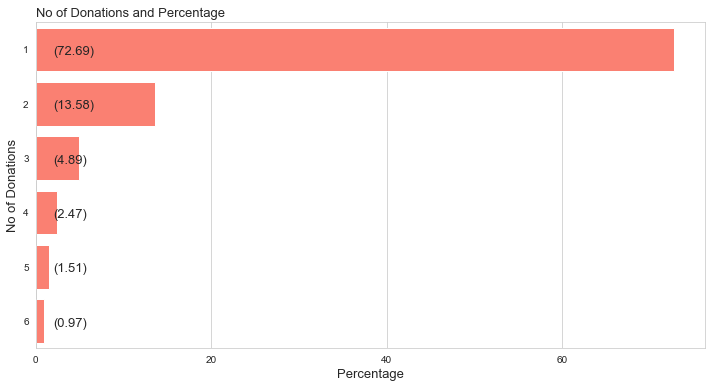

In [71]:
sns.axes_style("whitegrid");
plt.figure(figsize=(12,6));
ax = sns.barplot(x="Percent", y="No_of_donations",color="salmon", saturation=1, orient="h", data=freq_donation_table);
ax.set_xlabel("Percentage", size = 13);
ax.set_ylabel("No of Donations", size = 13);
ax.set_title("No of Donations and Percentage", size = 13, loc = 'left');
ax.set_xticks(ticks =(0,20,40,60));
for p in ax.patches:
    width = p.get_width()
    plt.text(2, p.get_y()+0.55*p.get_height(),
             '({:1.2f})'.format(width),size = 13,
             ha='left', va='center');

#for p in ax.patches:
 #   width = p.get_width()
  #  plt.text(2+p.get_width(), p.get_y()+0.55*p.get_height(),
   #          '({:1.2f})'.format(width),
    #         ha='left', va='center')

### Donations

In [72]:
df_donations_raw.head()

,Project ID,Donation ID,Donor ID,Donation Included Optional Donation,Donation Amount,Donor Cart Sequence,Donation Received Date
0,000009891526c0ade7180f8423792063,688729120858666221208529ee3fc18e,1f4b5b6e68445c6c4a0509b3aca93f38,No,178.37,11,2016-08-23 13:15:57
1,000009891526c0ade7180f8423792063,dcf1071da3aa3561f91ac689d1f73dee,4aaab6d244bf3599682239ed5591af8a,Yes,25.00,2,2016-06-06 20:05:23
2,000009891526c0ade7180f8423792063,18a234b9d1e538c431761d521ea7799d,0b0765dc9c759adc48a07688ba25e94e,Yes,20.00,3,2016-06-06 14:08:46
3,000009891526c0ade7180f8423792063,38d2744bf9138b0b57ed581c76c0e2da,377944ad61f72d800b25ec1862aec363,Yes,25.00,1,2016-05-15 10:23:04
4,000009891526c0ade7180f8423792063,5a032791e31167a70206bfb86fb60035,6d5b22d39e68c656071a842732c63a0c,Yes,25.00,2,2016-05-17 01:23:38


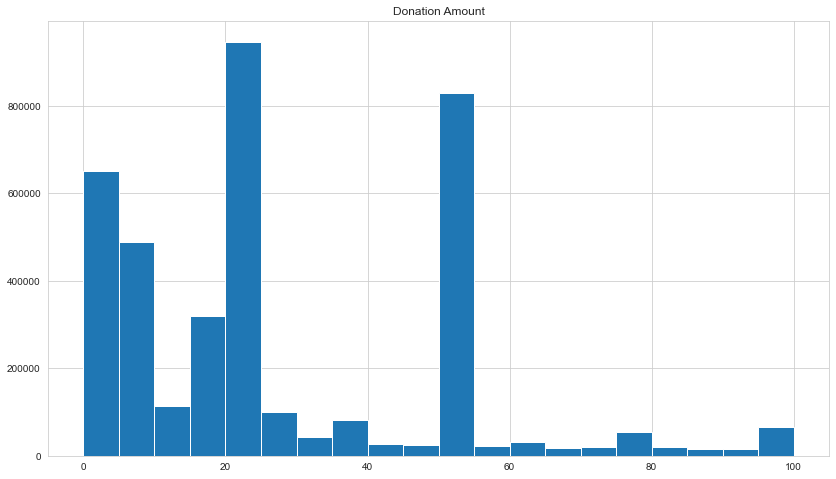

In [73]:
df_donations_raw[df_donations_raw["Donation Amount"] <100].hist(column='Donation Amount',bins=20);

#plt.hist(df_donations_raw["Donation Amount"] )

#plt.show()

### Projects

In [74]:
df_projects_raw.head(1)

,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Expiration Date,Project Current Status,Project Fully Funded Date
0,7685f0265a19d7b52a470ee4bac883ba,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,25,Teacher-Led,Stand Up to Bullying: Together We Can!,"Did you know that 1-7 students in grades K-12 is either a bully or a victim of bullying? My goal is to raise prevention through being educated and aware of the effects and consequences of bullying. They need to know how to access a science-base, research-validated curriculum via Internet and books. <!--DONOTREMOVEESSAYDIVIDER-->We are part of a small pre-k and kindergarten primary center. Our student population is less than 300 students. My students are learning to stand up to bullying. They are great kids discovering the world and learning to read and write. But I worry that next year when they leave our primary center and attend their neighborhood school (student population over 500) they will face a very different environment. I hope that the lessons that they have learned about friendships, kindness, and working cooperatively will reduce any instances of bullying. I want to raise awareness and educate my students so they can ask for help when they needed. Vigilance and discipline is the key! <!--DONOTREMOVEESSAYDIVIDER-->We know that knowledge is power; I want my students to know how to access information that will help them stand up to bullying. My project is to work with them in group discussions using their book, ""Bullying in Schools"" as they will all have a copy to keep and share with their parents. I will use the tablet with a small group of four kids at a time. Together we will navigate web sites to watch videos and testimonials. They can then talk about it, share with their parents, and I can lead class discussions. \n\nThere is access to information, articles and poems, and making them aware will educate them further on bullying. We must rise up and be the change to reach bullying in the heart of the problem. Bullying takes many forms and can happen in many contexts. Bullying is complex and there is no one size fits all solution for it, but knowledge is power. My students need to know how to find answers and information when they need it. <!--DONOTREMOVEESSAYDIVIDER-->This problem of bullying in schools is not one without a solution. We need every one helping teachers, parents, administrators and people in our community. The facts show that it is estimated that 160,000 children miss school every day due to fear of attack or intimidation by other students. Being aware of these facts should raise awareness and support. Your efforts will certainly have an impact. Together we can stand up to bullying.",Did you know that 1-7 students in grades K-12 is either a bully or a victim of bullying? My goal is to raise prevention through being educated and aware of the effects and consequences of...,"My students need 25 copies of ""Bullying in Schools"" for each to keep, ""Stand Up For Yourself and Your Friends: Dealing With Bullies"", ""A Smart Kid's Guide to Online Bullying"" and a tablet to research specific websites that talk about prevention strategies on bullying.",Applied Learning,"Character Education, Early Development",Grades PreK-2,Technology,361.8,2013-01-01,2013-05-30,Fully Funded,2013-01-11


In [75]:
# Percentage of projects funded/not funded
df1 = df_projects_raw['Project Current Status'].value_counts(normalize = True) * 100

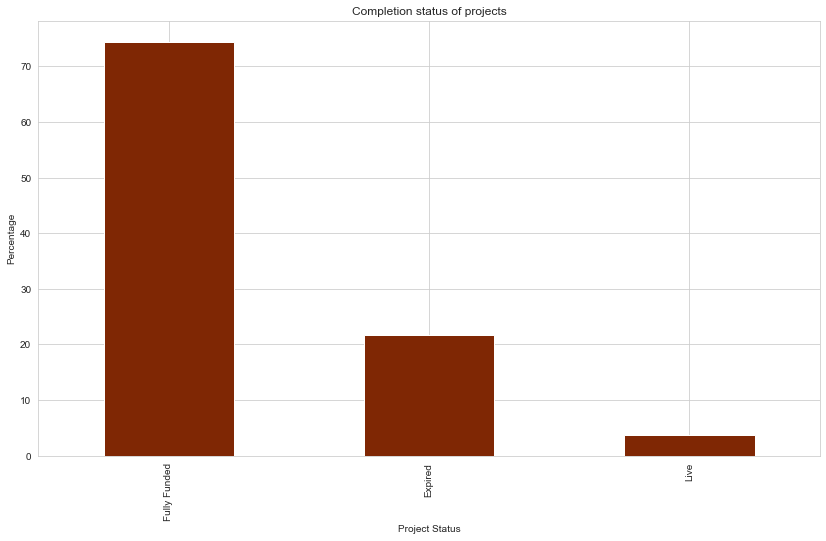

In [76]:
df1.plot(kind="bar",cmap='Oranges_r');
plt.xlabel('Project Status');
plt.ylabel('Percentage');
plt.title("Completion status of projects");

In [77]:
# Type of project 10- fully funded or not, 1 or more donations


In [78]:
# Month wise projects posted - fully funded or not, 1 or more donations, avg duration for funding

In [79]:
# State/ pin wise projects fuly funded or not proportion

### Resources

In [80]:
# Projects fully funded or not - based on  resource vendor
# Projects with single or multiple donations - based on  resource vendor

In [81]:
# Items with single or multiple donations - based on  resource vendor

### Schools

In [82]:
#school locality - single or multiple, fully funded or not

In [83]:
#school type - single or multiple, fully funded or not

### Teachers

In [84]:
df_proj_merged1 = pd.merge(df_donations_raw,df_donors_raw, on='Donor ID', how='left')
df_proj_merged2 = pd.merge(df_proj_merged1,df_projects_raw, on='Project ID', how='left')
df_proj_merged3 = pd.merge(df_proj_merged2,df_schools_raw, on='School ID', how='left')

In [85]:
df_proj_merged3.head()

,Project ID,Donation ID,Donor ID,Donation Included Optional Donation,Donation Amount,Donor Cart Sequence,Donation Received Date,Donor City,Donor State,Donor Is Teacher,Donor Zip,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Expiration Date,Project Current Status,Project Fully Funded Date,School Name,School Metro Type,School Percentage Free Lunch,School State,School Zip,School City,School County,School District
0,000009891526c0ade7180f8423792063,688729120858666221208529ee3fc18e,1f4b5b6e68445c6c4a0509b3aca93f38,No,178.37,11,2016-08-23 13:15:57,West Jordan,Utah,No,840,5aa86a53f658c198fd4e42c541411c76,6d5b22d39e68c656071a842732c63a0c,6.0,Teacher-Led,OHMS Musician Chair Cart,"The music students in our classes perform frequently throughout the school year. This means moving a lot of musical equipment around, like instruments, music stands and our student music chairs. <!--DONOTREMOVEESSAYDIVIDER-->The students in our music classes are dedicated musicians who pride themselves on their talent. They identify strongly as band and orchestra students. Being able to share their music with each other, their families and our community is very important to them, and is a big part of who they are individually and as an ensemble. <!--DONOTREMOVEESSAYDIVIDER-->When we move into our auditorium, most students are able to carry their instrument, their folder and one chair. This cart will allow us to move chairs 18 at a time. Having this chair cart will greatly reduce the amount of time it will take us to move our equipment from our rehearsal space to our auditorium, which will give us back time to prepare for performances in our auditorium. <!--DONOTREMOVEESSAYDIVIDER-->By contributing to our classroom, you will be helping our students to be more efficient in our rehearsals. We can recover time that would otherwise have been lost in moving equipment and use that time to better prepare to share our music with those closest to us. You will be supporting school musicians and school music programs. Thank you for your consideration.","The music students in our classes perform frequently throughout the school year. This means moving a lot of musical equipment around, like instruments, music stands and our student music chairs....",My students need a cart to help us manage our chairs.,Music & The Arts,Music,Grades 6-8,Other,529.68,2016-05-13,2016-09-12,Fully Funded,2016-08-23,Oquirrh Hills Middle School,suburban,23.0,Utah,84065.0,Riverton,Salt Lake,Jordan School District
1,000009891526c0ade7180f8423792063,dcf1071da3aa3561f91ac689d1f73dee,4aaab6d244bf3599682239ed5591af8a,Yes,25.00,2,2016-06-06 20:05:23,Riverton,Utah,Yes,840,5aa86a53f658c198fd4e42c541411c76,6d5b22d39e68c656071a842732c63a0c,6.0,Teacher-Led,OHMS Musician Chair Cart,"The music students in our classes perform frequently throughout the school year. This means moving a lot of musical equipment around, like instruments, music stands and our student music chairs. <!--DONOTREMOVEESSAYDIVIDER-->The students in our music classes are dedicated musicians who pride themselves on their talent. They identify strongly as band and orchestra students. Being able to share their music with each other, their families and our community is very important to them, and is a big part of who they are individually and as an ensemble. <!--DONOTREMOVEESSAYDIVIDER-->When we move into our auditorium, most students are able to carry their instrument, their folder and one chair. This cart will allow us to move chairs 18 at a time. Having this chair cart will greatly reduce the amount of time it will take us to move our equipment from our rehearsal space to our auditorium, which will give us back time to prepare for performances in our auditorium. <!--DONOTREMOVEESSAYDIVIDER

In [86]:
df_state1 = df_proj_merged3.groupby( ['Donor State','School State'] ).size().reset_index(name='Num_donations')

# Count number of donations based on same or different state
df_state2 = df_state1.assign(
 Same_state = np.where(df_state1['Donor State']==df_state1['School State'], df_state1.Num_donations,0),
 Diff_state = np.where(df_state1['Donor State']!=df_state1['School State'],df_state1.Num_donations,0)
  ).groupby('Donor State').agg({'Same_state':sum, 'Diff_state':sum})

df_state2['Percent_diff_state'] = round(((df_state2['Diff_state'] /(df_state2['Same_state'] + df_state2['Diff_state']))*100),2)
df_state2.sort_values(by='Percent_diff_state',ascending=False, inplace=True)

In [91]:
df1_state1 = df_proj_merged3.groupby( ['Donor State','Donor Is Teacher','School State'] ).size().reset_index(name='Num_donations')
df1_state1

,Donor State,Donor Is Teacher,School State,Num_donations
0,Alabama,No,Alabama,25239
1,Alabama,No,Alaska,25
2,Alabama,No,Arizona,104
3,Alabama,No,Arkansas,109
4,Alabama,No,California,519
...,...,...,...,...
5230,other,Yes,Virginia,2178
5231,other,Yes,Washington,1864
5232,other,Yes,West Virginia,392
5233,other,Yes,Wisconsin,1663


In [89]:
# Count number of donations based on same or different state
df1_state2 = df1_state1.assign(
 Same_state = np.where(df1_state1['Donor State']==df1_state1['School State'], df1_state1.Num_donations,0),
 Diff_state = np.where(df1_state1['Donor State']!=df1_state1['School State'],df1_state1.Num_donations,0)
  ).groupby(['Donor State','Donor Is Teacher']).agg({'Same_state':sum, 'Diff_state':sum})
df1_state2['Percent_diff_state'] = round(((df1_state2['Diff_state'] /(df1_state2['Same_state'] + df1_state2['Diff_state']))*100),2)
#df1_state2.sort_values(by='Percent_diff_state',ascending=False, inplace=True)
df1_state2

Same_state  Diff_state  \
Donor State          Donor Is Teacher                           
Alabama              No                     25239        8276   
                     Yes                     9886        6601   
Alaska               No                      4695        2936   
                     Yes                     2307         791   
Arizona              No                     42980       20272   
                     Yes                    14629        5211   
Arkansas             No                     12824        4795   
                     Yes                     6029        4373   
California           No                    397046      124518   
                     Yes                   127450       44563   
Colorado             No                     30643       22654   
                     Yes                     9095        3548   
Connecticut          No                     30947       17990   
                     Yes                    12778        6177   
Delaware             No                      9465        3721   
                     Yes                     2480        2206   
District of Columbia No                      8003       10671   
                     Yes                     2762        1781   
Florida              No                    109098       44508   
                     Yes                    50036       25900   
Georgia              No                     66293       28206   
                     Yes                    29590       23808   
Hawaii               No                      9131        3958   
                     Yes                     2999         619   
Idaho                No                      8071        3707   
                     Yes                     5673        8794   
Illinois             No                    120197       46496   
                     Yes                    41572       22085   
Indiana              No                     50858       20915   
                     Yes                    21618       24079   
Iowa                 No                     11011        6918   
                     Yes                     3541        2424   
Kansas               No                     10818        7725   
                     Yes                     4054        1001   
Kentucky             No                     18392        6650   
                     Yes                     7262        2396   
Louisiana            No                     26320        8089   
                     Yes                    10666        2649   
Maine                No                     12869        7477   
                     Yes                     4581        1623   
Maryland             No                     33238       28872   
                     Yes                    10509        4150   
Massachusetts        No                     64417       38760   
                     Yes                    20680       12989   
Michigan             No                     63982       25035   
                     Yes                    22177        8143   
Minnesota            No                     29886       14952   
                     Yes                     9930        4310   
Mississippi          No                     12581        3455   
                     Yes                     6774        3056   
Missouri             No                     37873       14180   
                     Yes                    17720       15824   
Montana              No                      5273        2444   
                     Yes                     1876        1021   
Nebraska             No                      4965        3832   
                     Yes                     1690         644   
Nevada               No                     17500        5973   
                     Yes                     7451        3296   
New Hampshire        No                      8670        6607   
                     Yes                     2290         988   
New Jerse

In [222]:
test = df1_state2.reset_index()

test.sort_values(by=['Percent_diff_state'], ascending = False)

,Donor State,Donor Is Teacher,Same_state,Diff_state,Percent_diff_state
103,other,Yes,0,80634,100.00
102,other,No,0,103690,100.00
101,Wyoming,Yes,339,801,70.26
25,Idaho,Yes,5673,8794,60.79
100,Wyoming,No,948,1388,59.42
16,District of Columbia,No,8003,10671,57.14
91,Vermont,Yes,986,1213,55.16
78,Rhode Island,No,6799,8342,55.10
29,Indiana,Yes,21618,24079,52.69
60,New Jersey,No,42892,43875,50.57


In [223]:
states = ['Wyoming', 'Idaho', 'Colorado', 'Pennsylvania', 'Oklahoma']

state1 = 'Wyoming'
state2 = 'Idaho'
state3 = 'Colorado'
state4 = 'Pennsylvania'
state5 = 'Oklahoma'

In [237]:
test = test[test['Donor State'].isin (states)] # ['Wyoming', 'Idaho', 'Colorado', 'Pennsylvania', 'Oklahoma']]

test = test.sort_values(by = ["Percent_diff_state", "Donor Is Teacher"], ascending = False)

test

,Donor State,Donor Is Teacher,Same_state,Diff_state,Percent_diff_state
101,Wyoming,Yes,339,801,70.26
25,Idaho,Yes,5673,8794,60.79
100,Wyoming,No,948,1388,59.42
10,Colorado,No,30643,22654,42.51
77,Pennsylvania,Yes,24030,14879,38.24
76,Pennsylvania,No,68978,40865,37.20
24,Idaho,No,8071,3707,31.47
11,Colorado,Yes,9095,3548,28.06
73,Oklahoma,Yes,12871,3297,20.39
72,Oklahoma,No,39703,5826,12.80


{'figure.facecolor': 'white',
 'axes.labelcolor': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'axes.axisbelow': True,
 'grid.linestyle': '-',
 'text.color': '.15',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'xtick.top': False,
 'ytick.right': False,
 'axes.grid': True,
 'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'grid.color': '.8',
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'xtick.bottom': False,
 'ytick.left': False}

<Figure size 864x432 with 0 Axes>

Text(0.5, 0, 'States')

Text(0, 0.5, 'Percent of Funding Outside the State')

Text(0.5, 1.0, 'Percentage of Out-of-state Donations')

Text(0, 9, '70.3')

Text(0, 9, '60.8')

Text(0, 9, '28.1')

Text(0, 9, '38.2')

Text(0, 9, '20.4')

Text(0, 9, '59.4')

Text(0, 9, '31.5')

Text(0, 9, '42.5')

Text(0, 9, '37.2')

Text(0, 9, '12.8')

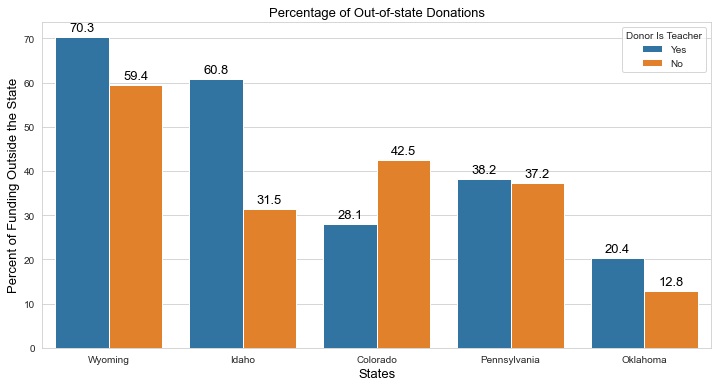

In [240]:
sns.axes_style("whitegrid");
plt.figure(figsize=(12,6));

# ax = sns.barplot(x = 'Project Resource Category', y = "Percent Fully Funded", orient = "v", data=vizProj, ci = None);
ax = sns.barplot(x = 'Donor State', y = "Percent_diff_state", orient = "v", hue = "Donor Is Teacher", data=test, ci = None);

ax.set_xlabel("States", size = 13, color = "black");
ax.set_ylabel("Percent of Funding Outside the State", size = 13, color = "black");
ax.set_title("Percentage of Out-of-state Donations", size = 13, loc = 'center', color = "black");
# ax.set(ylim = (40, 80))

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), size = 13, color = "black",
                   textcoords = 'offset points')

plt.savefig("viz3.png")

,Single_donor,Recurring_donor,Total_donors,percent
Donor State,,,,
California,211572,83123,423144,19.64
Texas,102140,32309,204280,15.82
New York,100591,37366,201182,18.57
Florida,81507,27321,163014,16.76
other,81337,26472,162674,16.27
Illinois,76542,27839,153084,18.19
North Carolina,60935,23315,121870,19.13
Pennsylvania,53957,18323,107914,16.98
Georgia,46892,16839,93784,17.96


Text(0.5, 0, 'States')

Text(0, 0.5, 'Number of donors')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

Text(-0.25, 211572.0, '[2, 3]')

Text(0.75, 102140.0, '[2, 3]')

Text(1.75, 100591.0, '[2, 3]')

Text(2.75, 81507.0, '[2, 3]')

Text(3.75, 81337.0, '[2, 3]')

Text(4.75, 76542.0, '[2, 3]')

Text(5.75, 60935.0, '[2, 3]')

Text(6.75, 53957.0, '[2, 3]')

Text(7.75, 46892.0, '[2, 3]')

Text(8.75, 45407.0, '[2, 3]')

Text(9.75, 45204.0, '[2, 3]')

Text(10.75, 41142.0, '[2, 3]')

Text(11.75, 39817.0, '[2, 3]')

Text(12.75, 39752.0, '[2, 3]')

Text(13.75, 34906.0, '[2, 3]')

Text(14.75, 33620.0, '[2, 3]')

Text(15.75, 31529.0, '[2, 3]')

Text(16.75, 30048.0, '[2, 3]')

Text(17.75, 27385.0, '[2, 3]')

Text(18.75, 26855.0, '[2, 3]')

Text(-0.25, 83123.0, '[2, 3]')

Text(0.75, 32309.0, '[2, 3]')

Text(1.75, 37366.0, '[2, 3]')

Text(2.75, 27321.0, '[2, 3]')

Text(3.75, 26472.0, '[2, 3]')

Text(4.75, 27839.0, '[2, 3]')

Text(5.75, 23315.0, '[2, 3]')

Text(6.75, 18323.0, '[2, 3]')

Text(7.75, 16839.0, '[2, 3]')

Text(8.75, 15028.0, '[2, 3]')

Text(9.75, 15526.0, '[2, 3]')

Text(10.75, 13124.0, '[2, 3]')

Text(11.75, 12754.0, '[2, 3]')

Text(12.75, 13270.0, '[2, 3]')

Text(13.75, 13057.0, '[2, 3]')

Text(14.75, 13423.0, '[2, 3]')

Text(15.75, 11708.0, '[2, 3]')

Text(16.75, 11481.0, '[2, 3]')

Text(17.75, 8990.0, '[2, 3]')

Text(18.75, 8965.0, '[2, 3]')

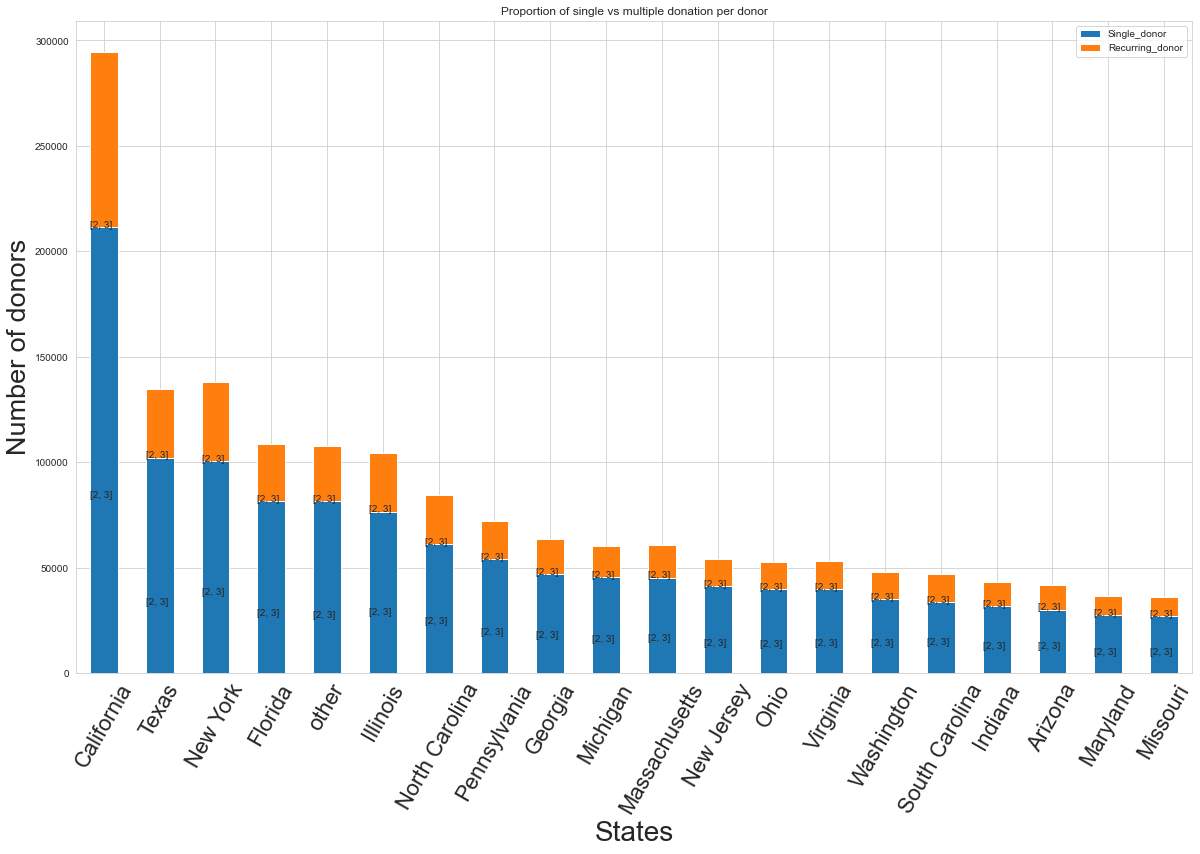

In [243]:
# Merge donor and donations table
df_donor_merged = pd.merge(df_donors_raw,df_donations_raw, on='Donor ID', how='left')
# Get the count of donors based on number of donations made
df_temp1 = df_donor_merged.groupby( ['Donor State','Donor ID'] ).size().reset_index(name='Num_donations')
#df_temp1[df_temp1['count']>1]
df_temp2 = df_temp1.groupby( ['Donor State','Num_donations'] ).size().reset_index(name='Num_donor')

# Count number of donors based on one or more donations
df_temp3 = df_temp2.assign(
 Single_donor = np.where(df_temp2['Num_donations']== 1 , df_temp2.Num_donor,0),
 Recurring_donor = np.where(df_temp2['Num_donations'] >1,df_temp2.Num_donor,0)
  ).groupby('Donor State').agg({'Single_donor':sum, 'Recurring_donor':sum})
# Get total donors 
df_temp3['Total_donors'] = df_temp3['Single_donor'] + df_temp3['Single_donor']
df_temp3['percent']= round((df_temp3['Recurring_donor']/df_temp3['Total_donors'])*100,2)
# Sort the table based on number of donors 
df_temp3.sort_values(by='Total_donors',ascending=False, inplace=True)



